In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data_path = "/content/drive/MyDrive/송파구_입학자_1999+2023.xlsx"
data = pd.read_excel(data_path)

In [ ]:
data.head()

,연도,입학자
0,1999,8920
1,2000,8577
2,2001,7925
3,2002,8021
4,2003,7429


In [ ]:
# '연도'를 인덱스로 설정
data.set_index('연도', inplace=True)

In [ ]:
# ADF 테스트 함수 정의
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# 송파구 입학자 수 데이터에 대한 ADF 테스트 수행
adf_result = test_stationarity(data['입학자'])
adf_result

Test Statistic                 -4.121379
p-value                         0.000893
#Lags Used                      4.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64

In [ ]:
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<Figure size 1400x700 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


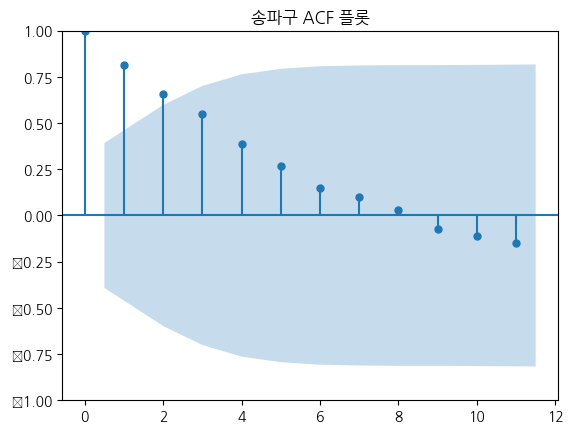

In [ ]:
# ACF 플롯 생성
plt.figure(figsize=(14, 7))
plot_acf(data['입학자'], lags=11, alpha=0.05)
plt.title('송파구 ACF 플롯')
plt.show()


<Figure size 1400x700 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


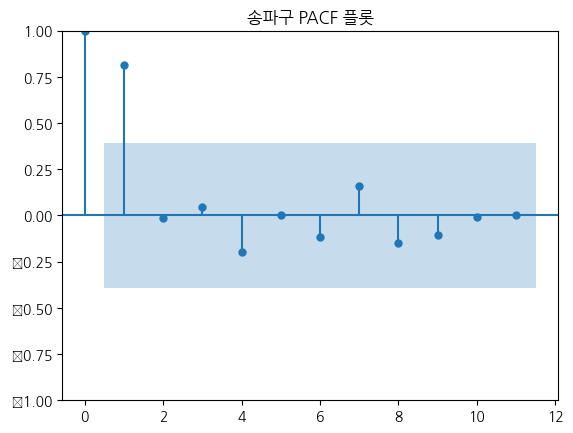

In [ ]:
# PACF 플롯 생성
plt.figure(figsize=(14, 7))
plot_pacf(data['입학자'], lags=11, alpha=0.05)
plt.title('송파구 PACF 플롯')
plt.show()

In [ ]:
train = data['입학자'][:int(0.8*len(data))]

In [ ]:
test = data['입학자'][int(0.8*len(data))-1:]

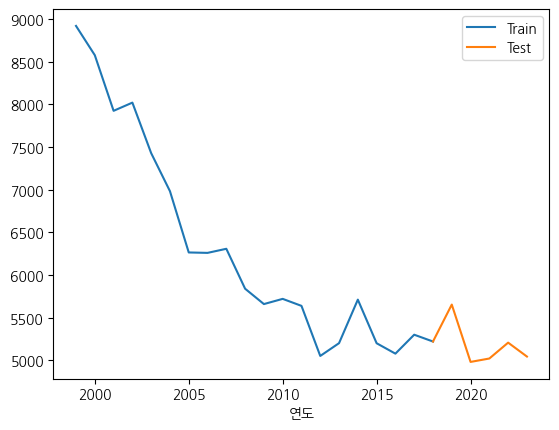

In [ ]:
train.plot(label='Train')
test.plot(label='Test')
plt.legend()
plt.show()

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(y=train,
                      d=0,
                      start_p=0,
                      max_p=5,
                      start_q=0,
                      max_q=0,
                      m=1,
                      seasonal=False,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=409.498, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=344.328, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=303.859, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=305.170, Time=0.47 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.725 seconds


In [ ]:
model2 = pm.auto_arima(train, d=0, seasonal = False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=409.498, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=306.163, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=308.030, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=306.585, Time=0.31 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.762 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -148.930
Date:                Fri, 14 Jun 2024   AIC                            303.859
Time:                        12:07:40   BIC                            306.846
Sample:                             0   HQIC                           304.442
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    181.4805    516.101      0.352      0.725    -830.059    1193.021
ar.L1          0.9737      0.072     13.511      0.000       0.832       1.115
sigma2      1.483e+05   6.39e+04      2.322      0.020    2.31e+04    2.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.51   Prob(JB):                         0.67
Heteroskedasticity (H):               0.58   Skew:                             0.18
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -150.082
Date:                Fri, 14 Jun 2024   AIC                            306.163
Time:                        12:07:40   BIC                            309.150
Sample:                             0   HQIC                           306.746
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9980      0.007    135.103      0.000       0.984       1.012
ma.L1          0.2220      0.281      0.791      0.429      -0.328       0.772
sigma2      1.432e+05   6.58e+04      2.176      0.030    1.42e+04    2.72e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.27   Prob(JB):                         0.51
Heteroskedasticity (H):               0.65   Skew:                            -0.04
Prob(H) (two-sided):                  0.58   Kurtosis:                         1.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


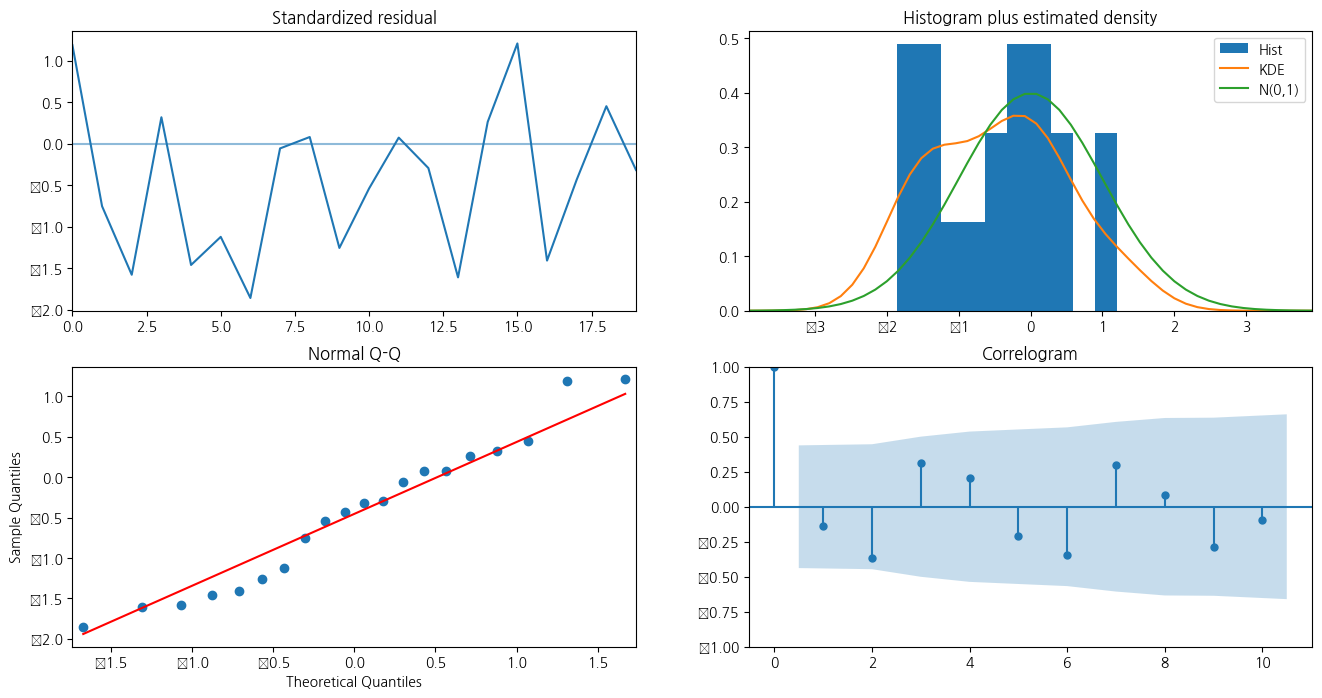

In [ ]:
#시각화를 통한 정상성 확인
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
test.shape

(6,)

In [ ]:
# 예측 -> 리스트로 변환
pred = model2.predict(n_periods=len(test)).to_list()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# 데이터 프레임 생성
test_pred = pd.DataFrame({'test':test,'pred':pred},index=test.index)
test_pred

,test,pred
연도,,
2018,5221,5183.883375
2019,5654,5173.445322
2020,4982,5163.028285
2021,5022,5152.632225
2022,5208,5142.257097
2023,5045,5131.902860


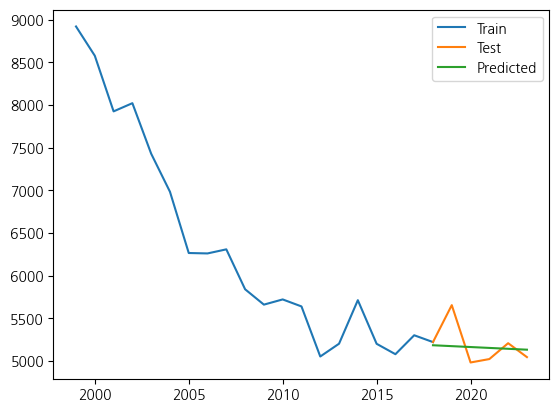

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred.pred, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
# one point forecast 함수 정의, 신뢰구간도 함께 담아보기
def forcast_one_step():
  fc, conf = model2.predict(n_periods=1, return_conf_int=True)
  return fc.tolist()[0], np.asarray(conf).tolist()[0]

# 값들을 담을 빈 리스트 생성
y_pred = []
pred_upper = []
pred_lower = []

# for문을 통한 예측 및 모델 업데이트 반복
for new_ob in test:
  fc, conf = forcast_one_step()
  y_pred.append(fc)
  pred_upper.append(conf[1])
  pred_lower.append(conf[0])
  model2.update(new_ob)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# 예측결과 데이터 프레임으로 만들기
test_pred2 = pd.DataFrame({'test':test, 'pred':y_pred})
y_pred_df = test_pred2['pred']	# Series로 반환
y_pred_df

연도
2018    5183.883375
2019    5218.469915
2020    5743.625456
2021    4902.225169
2022    5020.365713
2023    5210.703934
Name: pred, dtype: float64

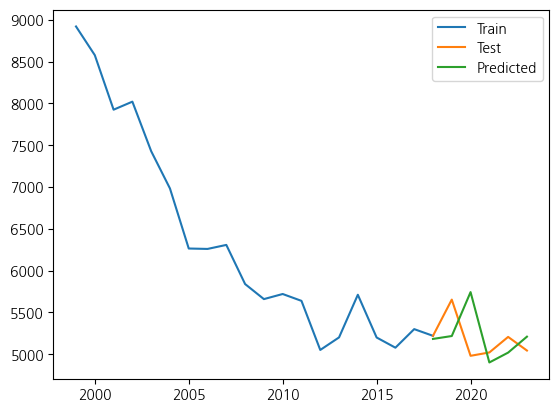

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_df, label='Predicted')
plt.legend()
plt.show()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -194.007
Date:                Fri, 14 Jun 2024   AIC                            394.015
Time:                        12:07:44   BIC                            397.789
Sample:                             0   HQIC                           395.102
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9981      0.004    233.284      0.000       0.990       1.006
ma.L1          0.0667      0.232      0.287      0.774      -0.388       0.522
sigma2      1.432e+05   5.22e+04      2.744      0.006    4.09e+04    2.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.30   Prob(JB):                         0.55
Heteroskedasticity (H):               0.47   Skew:                            -0.06
Prob(H) (two-sided):                  0.27   Kurtosis:                         1.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# sklearn으로 MAPE 계산
from sklearn.metrics import mean_absolute_percentage_error
print(f"MAPE : {mean_absolute_percentage_error(test, y_pred):.3f}")


MAPE : 0.055


In [ ]:


# numpy로 직접 계산
def MAPE(y_test, y_pred):
	return np.mean(np.abs((test - y_pred) / y_test))
print(f"MAPE : {MAPE(test, y_pred):.3f}")


MAPE : 0.055
